## Imagine you're a data scientist working with a medical research team aiming to predict individuals' susceptibility to heart disease based on various health factors. Your objective is to develop a robust machine learning model capable of accurately identifying individuals at risk of heart disease.

In [45]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
import pandas as pd

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
load_data = pd.read_csv('C:/OneDrive/Desktop/P documents/Assignments/Assignment 1/framingham.csv')
load_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [50]:
np.any(np.isnan(load_data))

True

In [51]:
load_data = load_data.dropna()
load_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [52]:
print(load_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB
None


In [53]:
print(load_data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  3656.000000  3656.000000  3656.000000    3656.000000  3656.000000   
mean      0.443654    49.557440     1.979759       0.489059     9.022155   
std       0.496883     8.561133     1.022657       0.499949    11.918869   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3656.000000      3656.000000   3656.000000  3656.000000  3656.000000   
mean      0.030361         0.005744      0.311543     0.027079   236.873085   
std       0.171602         0.075581      0.463187     0.162335    44.096223   

In [54]:
req_data = load_data[['male', 'age','currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'TenYearCHD']]
req_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,0


In [55]:
X = req_data[['male', 'age', 'cigsPerDay', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'TenYearCHD']]
Y = req_data[['currentSmoker']]

np_X = np.asanyarray(X)
np_Y = np.asanyarray(Y)

In [56]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scal.fit(np_X)
prepros = scal.transform(np_X)

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test=train_test_split(prepros, np_Y, test_size=0.2, random_state=2)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (2924, 9) (2924, 1)
Test set:  (732, 9) (732, 1)


In [61]:
model = LogisticRegression(C=0.01,solver='liblinear',verbose=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

[LibLinear]

In [62]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0
 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1
 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 0 1 0 1 0 1 0 1 1 1 0 

In [63]:
print((y_pred_prob))

[[0.7995628  0.2004372 ]
 [0.00202749 0.99797251]
 [0.73303621 0.26696379]
 ...
 [0.82899029 0.17100971]
 [0.73149209 0.26850791]
 [0.79108197 0.20891803]]


In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Classification Accuracy: ", end='\t')
print(accuracy_score(y_test, y_pred))

Classification Accuracy: 	0.9057377049180327




Confusion Matrix


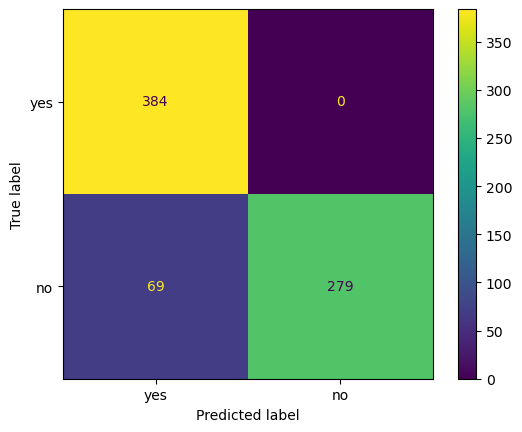

In [66]:
conf_mtrx = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['yes','no'])
print('\n')
conf_mtrx.plot()
print("Confusion Matrix")

In [69]:
from sklearn.metrics import jaccard_score
print("Jaccard Score: " , jaccard_score(y_test,y_pred))

Jaccard Score:  0.8017241379310345


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       384
           1       1.00      0.80      0.89       348

    accuracy                           0.91       732
   macro avg       0.92      0.90      0.90       732
weighted avg       0.92      0.91      0.90       732

